In [1]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

## Getting some (synthetic) data

In [3]:
N = 10 # number of points                                                                                                                                                                                   
def func(x):
    return math.sin(2*np.pi*x)

xmin = 0
xmax = 1.
np.random.seed(1231)
x_train = np.random.rand(N)
yclean = []
for i in range(N):
    yclean.append(func(x_train[i]) )

mu=0.
sigma=0.3
noise = st.norm.rvs(mu, sigma, size = N)
y_train = yclean + noise

x_train=np.array(x_train).reshape((len(x_train),1))


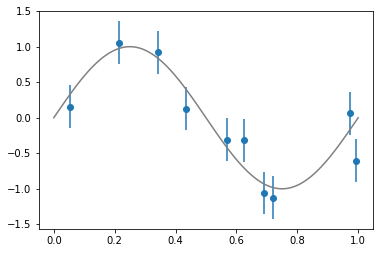

In [4]:
func_arr=[]
xs=np.linspace(0,1,100)
for xi in xs:
    func_arr.append(func(xi))

plt.errorbar(x_train,y_train,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.show()

## Model

we use a polynomial of order 9, where the prediction is: 

$f(x,{\vec w}) = {\vec w}^T \cdot \vec\phi(x) $,

where   $\vec\phi(x)=\{1,x,x^2,...,x^M\}^T$, with $M=9$ the order of the polynomial


In [5]:
# building the Phi matrix

M=9 

def Phi(x):
    N = len(x)
    mat = np.ones(N).reshape((-1,1))
    for h in range(1,M+1):
        mat=np.hstack((mat,x**h))
    return mat

The likelihood of the training data is:

$p({\bf y}_{\rm tr}| X_{\rm tr}, {\bf w}) = {\cal N}({\bf y}_{\rm tr}| \Phi\cdot{\bf w},\beta^{-1})$

where 
$\beta = 1/\sigma^2$    ($\sigma$ is the noise of the data)

The prior of the parameters:

$p({\bf w}) = {\cal N}({\bf w}| \boldsymbol{\mu}_0, S_0)$

will be simplified to have zero mean, and covariance matrix proportional to the identity, so the above reduces to:

$p({\bf w}) = {\cal N}({\bf w}| {\bf 0}, \alpha^{-1}{\bf 1})$




In [7]:
alpha=1.e-3

## The predictive distribution

This will be a gaussian with mean $m$ and variance $s^2$, defined below

In [11]:
beta=(1/sigma)**2   


Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi(x_train)).dot(Phi(x_train))   
# S is the covariance matrix of the posterior
S=np.linalg.inv(Sinv)

def phi(x):
    phi_arr=[]
    for m in range(M+1):
        phi_arr.append(x**m)
    return phi_arr

# variance of the predictive
s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))

# mean of the predictive
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi(x_train))).dot(y_train)


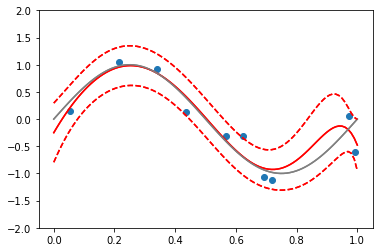

In [13]:
xs=np.linspace(0,1,100)

m_arr=[]
mmin_arr=[]
mplu_arr=[]
s2_arr=[]
for xi in xs:
    m_arr.append(m(xi))
    s2_arr.append(s2(xi))
    mmin_arr.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr.append(m(xi)+np.sqrt(s2(xi)))

plt.plot(xs,m_arr,color='red')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,mmin_arr,color='red',ls='--')
plt.plot(xs,mplu_arr,color='red',ls='--')
plt.scatter(x_train,y_train)
plt.ylim(-2,2)
plt.show()

## Behaviour of the predictive distribution with N (# of training points)

assume N=2 data points

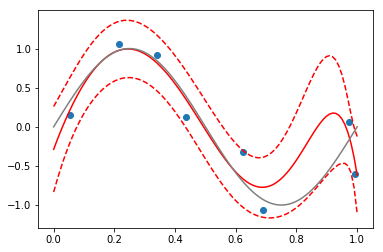

In [45]:
n=8

x_sub = x_train[:n]
x_sub=np.array(x_sub).reshape((len(x_sub),1))

y_sub = y_train[:n]


Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi(x_sub)).dot(Phi(x_sub))
S = np.linalg.inv(Sinv)

s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi(x_sub))).dot(y_sub)

m_arr=[]
mmin_arr=[]
mplu_arr=[]
s2_arr=[]
for xi in xs:
    m_arr.append(m(xi))
    s2_arr.append(s2(xi))
    mmin_arr.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr.append(m(xi)+np.sqrt(s2(xi)))

plt.plot(xs,m_arr,color='red')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,mmin_arr,color='red',ls='--')
plt.plot(xs,mplu_arr,color='red',ls='--')
plt.scatter(x_sub,y_sub)
plt.show()


In [46]:
s2(x_sub[0][0])

0.1319568765923833

In [44]:
2*1/beta

0.17999999999999997

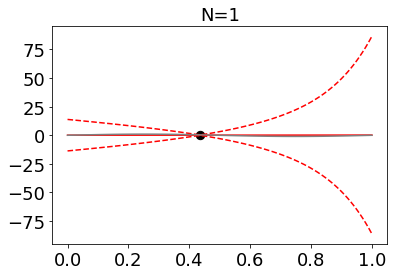

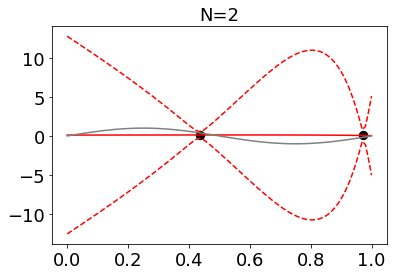

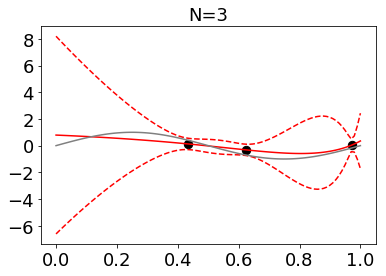

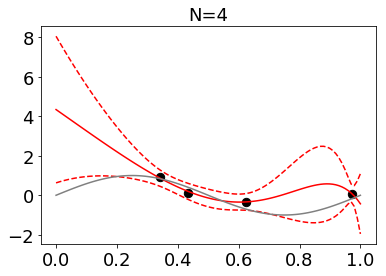

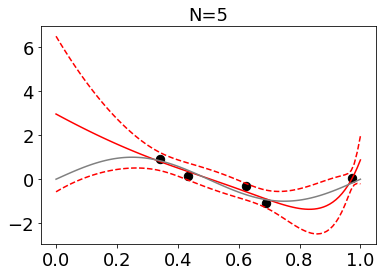

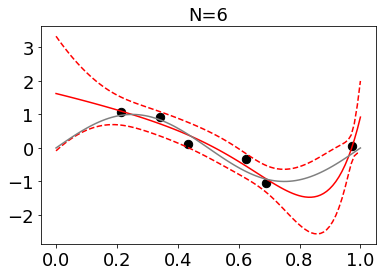

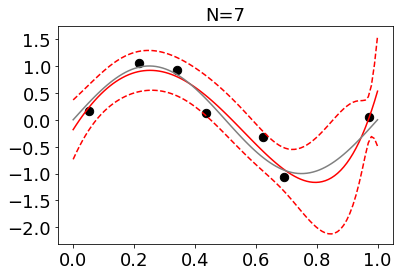

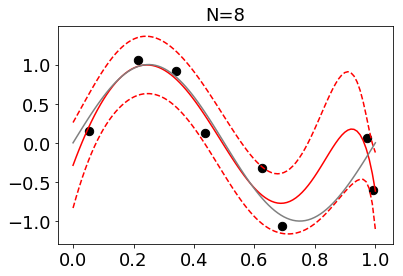

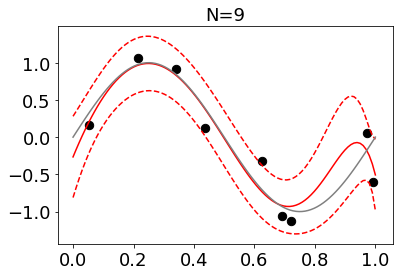

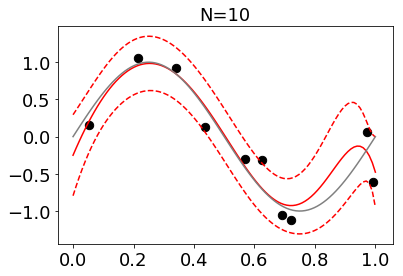

In [38]:
for n in range(1,N+1):
    x_tr=x_train[:n]
    y_tr=y_train[:n]
    
    x_tr=np.array(x_tr).reshape((len(x_tr),1))

    Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi(x_tr)).dot(Phi(x_tr))
    S=np.linalg.inv(Sinv)

    s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
    m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi(x_tr))).dot(y_tr)

    m_arr=[]
    mmin_arr=[]
    mplu_arr=[]
    for xi in xs:
        m_arr.append(m(xi))
        mmin_arr.append(m(xi)-np.sqrt(s2(xi)))
        mplu_arr.append(m(xi)+np.sqrt(s2(xi)))

    plt.figure()
    plt.plot(xs,m_arr,color='red')
    plt.plot(xs,mmin_arr,color='red',ls='--')
    plt.plot(xs,mplu_arr,color='red',ls='--')
    plt.scatter(x_tr,y_tr,s=70,color='black')
    plt.plot(xs,func_arr,color='gray')
    plt.title('N='+np.str(n),size=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.ylim(-2,2)
    plt.show()